## Distribution of firm size firms

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)

### Load Compustat data

In [2]:
df= pd.read_csv("compustat_from_1990.csv")
df.sale.replace(np.NaN,0, inplace=True)
print(df.shape)
df.head()

(211966, 14)


,conm,gvkey,cik,tic,datadate,au,fyear,at,sale,ni,ib,oancf,sich,mv
0,AAR CORP,1004,1750.0,AIR,1991-05-31,6.0,1990,379.958,466.542,14.801,14.801,36.891,5080.0,224.460360
1,AAR CORP,1004,1750.0,AIR,1992-05-31,6.0,1991,395.351,422.657,10.020,10.020,8.814,5080.0,204.699595
2,AAR CORP,1004,1750.0,AIR,1993-05-31,6.0,1992,365.151,382.780,0.283,0.283,16.806,5080.0,214.663477
3,AAR CORP,1004,1750.0,AIR,1994-05-31,6.0,1993,417.626,407.754,9.494,9.484,6.697,5080.0,228.648720
4,AAR CORP,1004,1750.0,AIR,1995-05-31,6.0,1994,425.814,451.395,10.463,10.463,15.255,5080.0,243.405235


In [3]:
df['sic1']= (df['sich']/1000).astype(int).astype(str)

In [4]:
df.head()

,conm,gvkey,cik,tic,datadate,au,fyear,at,sale,ni,ib,oancf,sich,mv,sic1
0,AAR CORP,1004,1750.0,AIR,1991-05-31,6.0,1990,379.958,466.542,14.801,14.801,36.891,5080.0,224.460360,5
1,AAR CORP,1004,1750.0,AIR,1992-05-31,6.0,1991,395.351,422.657,10.020,10.020,8.814,5080.0,204.699595,5
2,AAR CORP,1004,1750.0,AIR,1993-05-31,6.0,1992,365.151,382.780,0.283,0.283,16.806,5080.0,214.663477,5
3,AAR CORP,1004,1750.0,AIR,1994-05-31,6.0,1993,417.626,407.754,9.494,9.484,6.697,5080.0,228.648720,5
4,AAR CORP,1004,1750.0,AIR,1995-05-31,6.0,1994,425.814,451.395,10.463,10.463,15.255,5080.0,243.405235,5


In [5]:
df=df[['conm', 'gvkey', 'tic', 'fyear', 'at', 'sale', 'mv', 'sic1']]
df.head()

,conm,gvkey,tic,fyear,at,sale,mv,sic1
0,AAR CORP,1004,AIR,1990,379.958,466.542,224.460360,5
1,AAR CORP,1004,AIR,1991,395.351,422.657,204.699595,5
2,AAR CORP,1004,AIR,1992,365.151,382.780,214.663477,5
3,AAR CORP,1004,AIR,1993,417.626,407.754,228.648720,5
4,AAR CORP,1004,AIR,1994,425.814,451.395,243.405235,5


In [6]:
df= df[(df['at'] != 0)]
df['log_at']=np.log10(df['at'])

<AxesSubplot:>

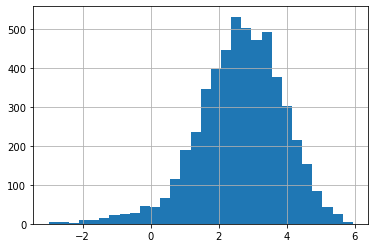

In [7]:
df[df['fyear']==2020]['log_at'].hist(bins=30)

-----------
## Plot with animation

In [10]:
df.head()

,conm,gvkey,tic,fyear,at,sale,mv,sic1,log_at
0,AAR CORP,1004,AIR,1990,379.958,466.542,224.460360,5,2.579736
1,AAR CORP,1004,AIR,1991,395.351,422.657,204.699595,5,2.596983
2,AAR CORP,1004,AIR,1992,365.151,382.780,214.663477,5,2.562472
3,AAR CORP,1004,AIR,1993,417.626,407.754,228.648720,5,2.620788
4,AAR CORP,1004,AIR,1994,425.814,451.395,243.405235,5,2.629220


In [11]:
# id_list= list(df[df.fyear==2020].mv.nlargest(100).index)
# id_list= df[df.index.isin(id_list)].gvkey

In [12]:
## Take 100 firms with largest MV in each year
id_list= list(df.groupby('fyear')['mv'].nlargest(300).reset_index()['level_1'])
df_largest= df[df.index.isin(id_list)]
print(df_largest.shape)
df_largest.sort_values('mv').tail(20)

(9300, 9)


,conm,gvkey,tic,fyear,at,sale,mv,sic1,log_at
86837,ALIBABA GROUP HLDG,20530,BABA,2020,257939.352,109463.430,6.109147e+05,7,5.411518
3540,APPLE INC,1690,AAPL,2015,290479.000,233715.000,6.153365e+05,3,5.463115
3537,APPLE INC,1690,AAPL,2012,176064.000,156508.000,6.265504e+05,3,5.245671
204420,TESLA INC,184996,TSLA,2020,52148.000,31536.000,6.774432e+05,3,4.717238
188748,ALPHABET INC,160329,GOOGL,2018,232792.000,136819.000,7.268282e+05,7,5.366968
188747,ALPHABET INC,160329,GOOGL,2017,197295.000,110855.000,7.318844e+05,7,5.295116
151364,AMAZON.COM INC,64768,AMZN,2018,162648.000,232887.000,7.374673e+05,5,5.211249
56994,MICROSOFT CORP,12141,MSFT,2018,258848.000,110360.000,7.570290e+05,7,5.413045
194830,META PLATFORMS INC,170617,META,2020,159316.000,85965.000,7.782328e+05,7,5.202259
3542,APPLE INC,1690,AAPL,2017,375319.000,229234.000,7.900501e+05,3,5.574401


In [13]:
df_largest= df_largest.sort_values(by=['fyear','mv'])

In [16]:
df_largest.head()

,conm,gvkey,tic,fyear,at,sale,mv,sic1,log_at
9832,CHAMPION INTERNATIONAL CORP,2917,CHA.3,1990,8351.409,5089.944,2382.305000,2,3.921760
15575,DOVER CORP,4058,DOV,1990,1468.366,2210.345,2383.847250,3,3.166834
50270,UNITED AIRLINES HOLDINGS INC,10795,UAL,1990,7993.821,11037.477,2410.085625,4,3.902754
50639,UNION CAMP CORP,10855,UCC.2,1990,4399.585,2839.704,2410.265000,2,3.643412
15656,DOW JONES & CO INC,4062,DJ,1990,2591.377,1720.084,2421.072000,2,3.413531


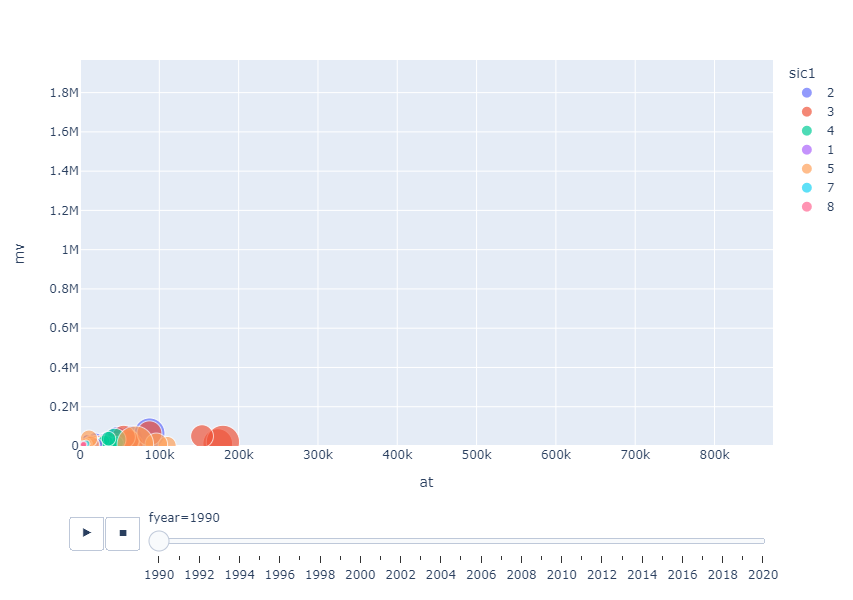

In [19]:
fig=px.scatter(df_largest, x='at', y='mv',
              animation_frame='fyear',
              animation_group='conm',
              height= 600,
              range_x=[0, max(df_largest['at'])],
              range_y=[0, max(df_largest['mv'])],
               size='sale', 
               size_max= 50,
               color='sic1',
              hover_name= 'conm')
fig.show()

In [26]:
df_largest[df_largest['conm']=='GENERAL ELECTRIC CO'].sort_values('fyear')

,conm,gvkey,tic,fyear,at,sale,mv,sic1,log_at
20412,GENERAL ELECTRIC CO,5047,GE,1990,153884.0,57766.0,50095.260000,3,5.187193
20413,GENERAL ELECTRIC CO,5047,GE,1991,168259.0,59433.0,66105.333000,3,5.225978
20414,GENERAL ELECTRIC CO,5047,GE,1992,192876.0,56322.0,73139.179500,3,5.285278
20415,GENERAL ELECTRIC CO,5047,GE,1993,251506.0,59869.0,89526.648625,3,5.400548
20416,GENERAL ELECTRIC CO,5047,GE,1994,194484.0,59361.0,87004.317000,3,5.288884
20417,GENERAL ELECTRIC CO,5047,GE,1995,228035.0,69276.0,119988.864000,3,5.358002
20418,GENERAL ELECTRIC CO,5047,GE,1996,272402.0,78541.0,162604.090250,3,5.435210
20419,GENERAL ELECTRIC CO,5047,GE,1997,304012.0,88540.0,239539.438000,3,5.482891
20420,GENERAL ELECTRIC CO,5047,GE,1998,355935.0,99820.0,333672.192000,3,5.551371
20421,GENERAL ELECTRIC CO,5047,GE,1999,405200.0,110832.0,508329.454250,9,5.607669
